In [7]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt


The above is importing the libaries required 

In [8]:
ticker="AAPL" #you can pick any other stock you like 
stock=yf.Ticker(ticker)
price=stock.history(period="6mo")['Close'] 

This will get the ticker for 'AAPL' and get the stock history from the previous 6 months 

In [9]:
sma5=price.rolling(window=5).mean() #gets the mean of the 5 in the window aka moving av 
sma20=price.rolling(window=20).mean()
df=pd.DataFrame({'Close':price,'SMA_5':sma5,'SMA_20':sma20})

sma5 and sma20 are the Simple Moving Averages for 5 and 20 day windows respectively.
df is the DataFrame which stores all this data as well as the closing price

In [10]:
df=df.reset_index()
df['Signal'] = 'Hold'  # default we hold 
for i in range(1, len(df)):
    if df.at[i, 'SMA_5'] > df.at[i, 'SMA_20'] and df.at[i - 1, 'SMA_5'] <= df.at[i - 1, 'SMA_20']:
        df.at[i, 'Signal'] = 'Buy' 
    elif df.at[i, 'SMA_5'] < df.at[i, 'SMA_20'] and df.at[i - 1, 'SMA_5'] >= df.at[i - 1, 'SMA_20']:
        df.at[i, 'Signal'] = 'Sell'


The reset_index will get the date as a column variable and change the indexing to a 0,1,2,3... type indexing 
Another column for signal is created which tells if you should hold,sell or buy
The logic is if SMA_5 crosses above SMA-20 then we buy and sell if vice versa  

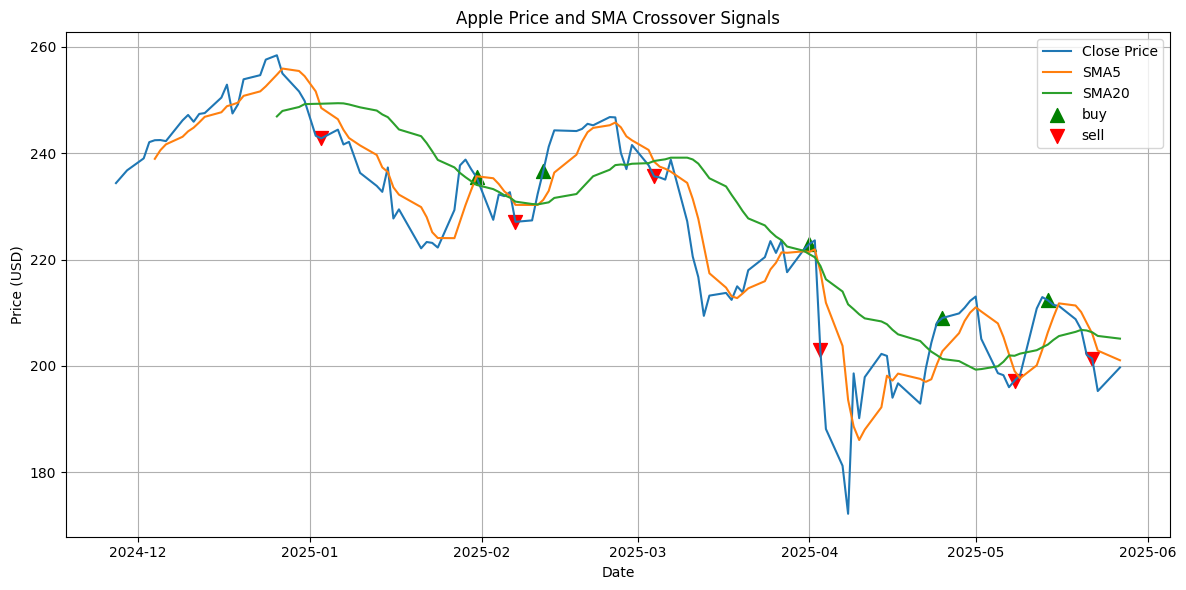

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Close'],label='Close Price')
plt.plot(df['Date'],df['SMA_5'],label='SMA5')
plt.plot(df['Date'],df['SMA_20'],label='SMA20')

buys=df[df['Signal']=='Buy']
sells=df[df['Signal']=='Sell']
plt.scatter(buys['Date'],buys['Close'],marker='^',color='green',s=100,label='buy')
plt.scatter(sells['Date'],sells['Close'],marker='v',color='red',s=100,label='sell')

plt.title('Apple Price and SMA Crossover Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
